In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar
from scipy.stats import t

In [52]:
dt1 = 5e-3
dt2 = 5.73e-3
dt3 = 6e-3
dt4 = 6.5e-3
dt5 = 6.63e-3

precision_1 = np.array([6.021e-2, 3.817e-2, 1.649e-2, 9.544e-3, 4.486e-3, 2.106e-3, 1.360e-3, 5.225e-4, 5.593e-4])
precision_2 = np.array([6.506e-2, 3.328e-2, 1.126e-2, 7.288e-2, 3.411e-3, 1.635e-3, 1.078e-3, 5.892e-4, 2.493e-4])
precision_3 = np.array([6.357e-2, 2.021e-2, 1.513e-2, 6.453e-3, 3.875e-3, 1.536e-3, 1.0296e-3, 4.734e-4, 2.652e-4])
precision_4 = np.array([4.827e-2, 2.858e-2, 1.410e-2, 5.284e-3, 3.718e-3, 1.882e-3, 1.195e-3, 9.196e-4, 4.914e-4])
precision_5 = np.array([5.739e-2, 2.565e-2, 1.225e-2, 6.834e-3, 3.569e-3, 1.727e-3, 1.357e-3, 8.237e-4, 4.535e-4])

powers_of_2 = np.arange(14, 23, 1)

Dopasowanie dla $\epsilon = \frac{k2^{-x}}{dt}$

In [98]:
#x = 2.0 ** (-1 * powers_of_2)
x = powers_of_2

def model(x, alpha, dt):
    return alpha * 2.0**(-x) / dt

def model_log(x, alpha, dt):
    return alpha - x * np.log(2.0) - np.log(dt)

precision_2_new = np.array([6.506e-2, 3.328e-2, 1.126e-2, 3.411e-3, 1.635e-3, 1.078e-3, 5.892e-4, 2.493e-4])
x_new = np.array([14, 15, 16, 18, 19, 20, 21, 22])

params_1, matr_cov_1 = curve_fit(lambda x, a: model(x, a, dt1), x, precision_1)
perr_1 = np.sqrt(np.diag(matr_cov_1))

params_2, matr_cov_2 = curve_fit(lambda x, a: model(x, a, dt2), x_new, precision_2_new)
perr_2 = np.sqrt(np.diag(matr_cov_2))

params_3, matr_cov_3 = curve_fit(lambda x, a: model(x, a, dt3), x, precision_3)
perr_3 = np.sqrt(np.diag(matr_cov_3))

params_4, matr_cov_4 = curve_fit(lambda x, a: model(x, a, dt4), x, precision_4)
perr_4 = np.sqrt(np.diag(matr_cov_4))

params_5, matr_cov_5 = curve_fit(lambda x, a: model(x, a, dt5), x, precision_5)
perr_5 = np.sqrt(np.diag(matr_cov_5))

dof = len(powers_of_2) - len(params_1)
tval = t.ppf(0.975, dof)


print(f"Parametr k dla dt1: {params_1[0]:0.2f} ± {(tval * perr_1[0]):0.2f}")
print(f"Parametr k dla dt2: {params_2[0]:0.2f} ± {(t.ppf(0.975, dof - 1) * perr_2[0]):0.2f}")
print(f"Parametr k dla dt3: {params_3[0]:0.2f} ± {(tval * perr_3[0]):0.2f}")
print(f"Parametr k dla dt4: {params_4[0]:0.2f} ± {(tval * perr_4[0]):0.2f}")
print(f"Parametr k dla dt5: {params_5[0]:0.2f} ± {(tval * perr_5[0]):0.2f}")

# Wykres (opcjonalnie)
x_dense = np.linspace(x.min(), x.max(), 500)

Parametr k dla dt1: 5.22 ± 0.43
Parametr k dla dt2: 6.04 ± 0.36
Parametr k dla dt3: 5.79 ± 0.72
Parametr k dla dt4: 5.36 ± 0.34
Parametr k dla dt5: 6.06 ± 0.25


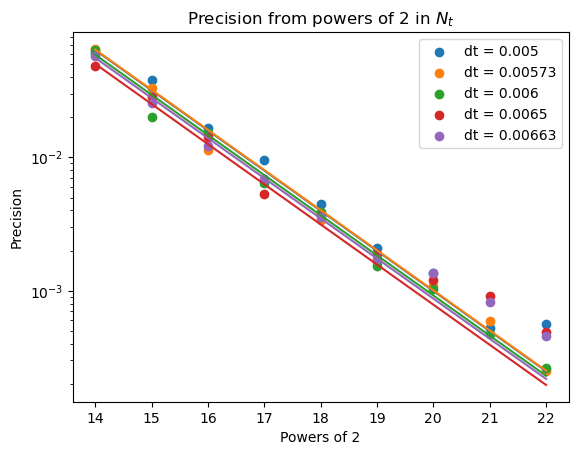

In [48]:
plt.plot(x_dense, model(x_dense, params_1, dt1), '-')
plt.plot(x_dense, model(x_dense, *params_2, dt2), '-')
plt.plot(x_dense, model(x_dense, *params_3, dt3), '-')
plt.plot(x_dense, model(x_dense, *params_4, dt4), '-')
plt.plot(x_dense, model(x_dense, *params_5, dt5), '-')

plt.scatter(powers_of_2, precision_1, label = f'dt = {dt1}')
plt.scatter(x_new, precision_2_new, label = f'dt = {dt2}')
plt.scatter(powers_of_2, precision_3, label = f'dt = {dt3}')
plt.scatter(powers_of_2, precision_4, label = f'dt = {dt4}')
plt.scatter(powers_of_2, precision_5, label = f'dt = {dt5}')
plt.xlabel('Powers of 2')
plt.ylabel('Precision')
plt.title('Precision from powers of 2 in $N_t$')
plt.legend()
plt.yscale('log')
plt.show()

In [13]:
def precision_model(x, dt, alpha=params_4[0]):
    return alpha / dt * 2.0 ** (-x)

def mean_precision_over_x(dt):
    y = precision_model(powers_of_2, dt)
    return np.sum(y)

In [124]:
result = minimize_scalar(mean_precision_over_x, bounds=(0.0045, 0.006506), method='bounded')
optimal_dt = result.x
print(f"Optymalne dt: {optimal_dt:.6f}")




Optymalne dt: 0.006500


Najlepšaje značeńnie $dt$ heta $dt_{max}$.

Szacowanie parametru $k$.

In [40]:
k = (params_1[0] / (tval * perr_1[0]) ** 2 + params_2[0] / (tval * perr_2[0]) ** 2 + params_3[0] / (tval * perr_3[0]) ** 2 + params_4[0] / (tval * perr_4[0]) ** 2 + params_5[0] / (tval * perr_5[0]) ** 2) / (1 / (tval * perr_1[0]) ** 2 + 1 / (tval * perr_2[0]) ** 2 + 1 / (tval * perr_3[0]) ** 2 + 1 / (tval * perr_4[0]) ** 2 + 1 / (tval * perr_5[0]) ** 2)
k

np.float64(5.773258165691483)

In [41]:
dk = np.sqrt(1 / (1 / (tval * perr_1[0]) ** 2 + 1 / (tval * perr_2[0]) ** 2 + 1 / (tval * perr_3[0]) ** 2 + 1 / (tval * perr_4[0]) ** 2 + 1 / (tval * perr_5[0]) ** 2))
dk

np.float64(0.15950967650219414)

Dopasowanie dla $\epsilon = \frac{k2^{-\lambda x}}{dt}$

In [102]:
#x = 2.0 ** (-1 * powers_of_2)
x = powers_of_2

def model(x, alpha, beta, dt):
    return alpha * 2.0**(-beta * x) / dt

precision_2_new = np.array([6.506e-2, 3.328e-2, 1.126e-2, 3.411e-3, 1.635e-3, 1.078e-3, 5.892e-4, 2.493e-4])
x_new = np.array([14, 15, 16, 18, 19, 20, 21, 22])

params_1, matr_cov_1 = curve_fit(lambda x, a, b: model(x, a, b, dt1), x, precision_1)
perr_1 = np.sqrt(np.diag(matr_cov_1))

params_2, matr_cov_2 = curve_fit(lambda x, a, b: model(x_new, a, b, dt2), x, precision_2_new)
perr_2 = np.sqrt(np.diag(matr_cov_2))

params_3, matr_cov_3 = curve_fit(lambda x, a, b: model(x, a, b, dt3), x, precision_3)
perr_3 = np.sqrt(np.diag(matr_cov_3))

params_4, matr_cov_4 = curve_fit(lambda x, a, b: model(x, a, b, dt4), x, precision_4)
perr_4 = np.sqrt(np.diag(matr_cov_4))

params_5, matr_cov_5 = curve_fit(lambda x, a, b: model(x, a, b, dt5), x, precision_5)
perr_5 = np.sqrt(np.diag(matr_cov_5))

dof = len(powers_of_2) - len(params_1)
tval = t.ppf(0.975, dof)


print(f"Parametry k, lamba dla dt1: {params_1[0]:0.2f} ± {(tval * perr_1[0]):0.2f}, {params_1[1]:0.2f} ± {(tval * perr_1[1]):0.2f}")
print(f"Parametry k, lamba dla dt2: {params_2[0]:0.2f} ± {(t.ppf(0.975, dof - 1) * perr_2[0]):0.2f}, {params_2[1]:0.2f} ± {(t.ppf(0.975, dof - 1) * perr_2[1]):0.2f}")
print(f"Parametry k, lamba dla dt3: {params_3[0]:0.2f} ± {(tval * perr_3[0]):0.2f}, {params_3[1]:0.2f} ± {(tval * perr_3[1]):0.2f}")
print(f"Parametry k, lamba dla dt4: {params_4[0]:0.2f} ± {(tval * perr_4[0]):0.2f}, {params_4[1]:0.2f} ± {(tval * perr_4[1]):0.2f}")
print(f"Parametry k, lamba dla dt5: {params_5[0]:0.2f} ± {(tval * perr_5[0]):0.2f}, {params_5[1]:0.2f} ± {(tval * perr_5[1]):0.2f}")

Parametry k, lamba dla dt1: 1.35 ± 1.60, 0.86 ± 0.12
Parametry k, lamba dla dt2: 16.00 ± 23.22, 1.10 ± 0.15
Parametry k, lamba dla dt3: 87.92 ± 258.34, 1.27 ± 0.30
Parametry k, lamba dla dt4: 1.96 ± 1.94, 0.90 ± 0.10
Parametry k, lamba dla dt5: 15.65 ± 10.49, 1.10 ± 0.07


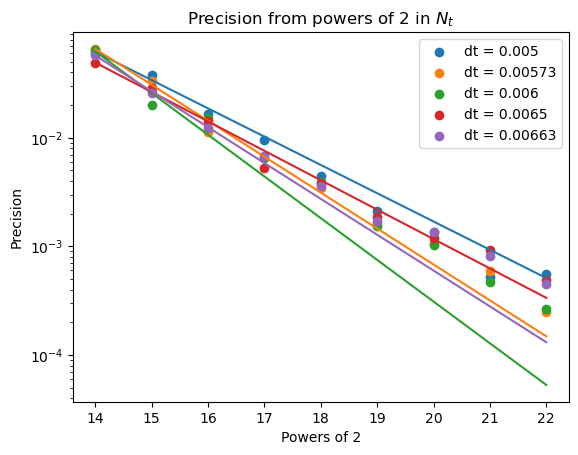

In [103]:
plt.plot(x_dense, model(x_dense, *params_1, dt1), '-')
plt.plot(x_dense, model(x_dense, *params_2, dt2), '-')
plt.plot(x_dense, model(x_dense, *params_3, dt3), '-')
plt.plot(x_dense, model(x_dense, *params_4, dt4), '-')
plt.plot(x_dense, model(x_dense, *params_5, dt5), '-')

plt.scatter(powers_of_2, precision_1, label = f'dt = {dt1}')
plt.scatter(x_new, precision_2_new, label = f'dt = {dt2}')
plt.scatter(powers_of_2, precision_3, label = f'dt = {dt3}')
plt.scatter(powers_of_2, precision_4, label = f'dt = {dt4}')
plt.scatter(powers_of_2, precision_5, label = f'dt = {dt5}')
plt.xlabel('Powers of 2')
plt.ylabel('Precision')
plt.title('Precision from powers of 2 in $N_t$')
plt.legend()
plt.yscale('log')
plt.show()

In [67]:
k = (params_1[0] / (tval * perr_1[0]) ** 2 + params_2[0] / (tval * perr_2[0]) ** 2 + params_3[0] / (tval * perr_3[0]) ** 2 + params_4[0] / (tval * perr_4[0]) ** 2 + params_5[0] / (tval * perr_5[0]) ** 2) / (1 / (tval * perr_1[0]) ** 2 + 1 / (tval * perr_2[0]) ** 2 + 1 / (tval * perr_3[0]) ** 2 + 1 / (tval * perr_4[0]) ** 2 + 1 / (tval * perr_5[0]) ** 2)
k

np.float64(1.8336547840259745)

In [68]:
dk = np.sqrt(1 / (1 / (tval * perr_1[0]) ** 2 + 1 / (tval * perr_2[0]) ** 2 + 1 / (tval * perr_3[0]) ** 2 + 1 / (tval * perr_4[0]) ** 2 + 1 / (tval * perr_5[0]) ** 2))
dk

np.float64(1.2228470619351917)

In [69]:
λ = (params_1[1] / (tval * perr_1[1]) ** 2 + params_2[1] / (tval * perr_2[1]) ** 2 + params_3[1] / (tval * perr_3[1]) ** 2 + params_4[1] / (tval * perr_4[1]) ** 2 + params_5[1] / (tval * perr_5[1]) ** 2) / (1 / (tval * perr_1[1]) ** 2 + 1 / (tval * perr_2[1]) ** 2 + 1 / (tval * perr_3[1]) ** 2 + 1 / (tval * perr_4[1]) ** 2 + 1 / (tval * perr_5[1]) ** 2)
λ

np.float64(1.0193177185672375)

In [70]:
dλ = np.sqrt(1 / (1 / (tval * perr_1[1]) ** 2 + 1 / (tval * perr_2[1]) ** 2 + 1 / (tval * perr_3[1]) ** 2 + 1 / (tval * perr_4[1]) ** 2 + 1 / (tval * perr_5[1]) ** 2))
dλ

np.float64(0.04696169954453725)

In [101]:
def model(x, alpha, beta, gamma, dt):
    return alpha * 2.0**(-(beta * dt + gamma) * x) / dt

params_1, matr_cov_1 = curve_fit(lambda x, a, b, c: model(x, a, b, c, dt1), x, precision_1)
perr_1 = np.sqrt(np.diag(matr_cov_1))

params_2, matr_cov_2 = curve_fit(lambda x, a, b, c: model(x, a, b, c, dt2), x_new, precision_2_new)
perr_2 = np.sqrt(np.diag(matr_cov_2))

params_3, matr_cov_3 = curve_fit(lambda x, a, b, c: model(x, a, b, c, dt3), x, precision_3)
perr_3 = np.sqrt(np.diag(matr_cov_3))

params_4, matr_cov_4 = curve_fit(lambda x, a, b, c: model(x, a, b, c, dt4), x, precision_4)
perr_4 = np.sqrt(np.diag(matr_cov_4))

params_5, matr_cov_5 = curve_fit(lambda x, a, b, c: model(x, a, b, c, dt5), x, precision_5)
perr_5 = np.sqrt(np.diag(matr_cov_5))

dof = len(powers_of_2) - len(params_1)
tval = t.ppf(0.975, dof)



print(f"Parametry k, beta, gamma dla dt1: {params_1[0]:0.2f} ± {(tval * perr_1[0]):0.2f}, {params_1[1]:0.2f} ± {(tval * perr_1[1]):0.2f}, {params_1[2]:0.2f} ± {(tval * perr_1[2]):0.2f}")
print(f"Parametry k, beta, gamma dla dt2: {params_2[0]:0.2f} ± {(t.ppf(0.975, dof - 1) * perr_2[0]):0.2f}, {params_2[1]:0.2f} ± {(t.ppf(0.975, dof - 1) * perr_2[1]):0.2f}, {params_2[2]:0.2f} ± {(t.ppf(0.975, dof - 1) * perr_2[2]):0.2f}")
print(f"Parametry k, beta, gamma dla dt3: {params_3[0]:0.2f} ± {(tval * perr_3[0]):0.2f}, {params_3[1]:0.2f} ± {(tval * perr_3[1]):0.2f}, {params_2[2]:0.2f} ± {(tval * perr_2[2]):0.2f}")
print(f"Parametry k, beta, gamma dla dt4: {params_4[0]:0.2f} ± {(tval * perr_4[0]):0.2f}, {params_4[1]:0.2f} ± {(tval * perr_4[1]):0.2f}, {params_2[2]:0.2f} ± {(tval * perr_2[2]):0.2f}")
print(f"Parametry k, beta, gamma dla dt5: {params_5[0]:0.2f} ± {(tval * perr_5[0]):0.2f}, {params_5[1]:0.2f} ± {(tval * perr_5[1]):0.2f}, {params_2[2]:0.2f} ± {(tval * perr_2[2]):0.2f}")


Parametry k, beta, gamma dla dt1: 1.35 ± 2.26, -17.31 ± 71775393.48, 0.95 ± 358876.89
Parametry k, beta, gamma dla dt2: 16.00 ± 45.39, 16.52 ± 154262359.23, 1.00 ± 883923.61
Parametry k, beta, gamma dla dt3: 87.92 ± 4271.81, 105.06 ± 4211956750.86, 1.00 ± 841398.28
Parametry k, beta, gamma dla dt4: 1.96 ± 2.18, 43.34 ± 117288765.29, 1.00 ± 841398.28
Parametry k, beta, gamma dla dt5: 15.65 ± 171.65, -523.35 ± 1681189688.78, 1.00 ± 841398.28


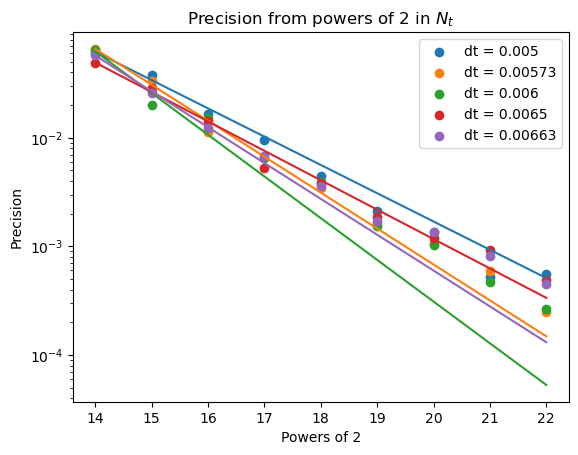

In [96]:
plt.plot(x_dense, model(x_dense, *params_1, dt1), '-')
plt.plot(x_dense, model(x_dense, *params_2, dt2), '-')
plt.plot(x_dense, model(x_dense, *params_3, dt3), '-')
plt.plot(x_dense, model(x_dense, *params_4, dt4), '-')
plt.plot(x_dense, model(x_dense, *params_5, dt5), '-')

plt.scatter(powers_of_2, precision_1, label = f'dt = {dt1}')
plt.scatter(x_new, precision_2_new, label = f'dt = {dt2}')
plt.scatter(powers_of_2, precision_3, label = f'dt = {dt3}')
plt.scatter(powers_of_2, precision_4, label = f'dt = {dt4}')
plt.scatter(powers_of_2, precision_5, label = f'dt = {dt5}')
plt.xlabel('Powers of 2')
plt.ylabel('Precision')
plt.title('Precision from powers of 2 in $N_t$')
plt.legend()
plt.yscale('log')
plt.show()